In [1]:
%matplotlib inline

# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_squared_error

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [2]:
vehicle_df = pd.read_csv("vehicle.csv") 
vehicle_df.tail().T

841  842  843  844  845
compactness                   93   89  106   86   85
circularity                   39   46   54   36   36
distance_circularity          87   84  101   78   66
radius_ratio                 183  163  222  146  123
pr.axis_aspect_ratio          64   66   67   58   55
max.length_aspect_ratio        8   11   12    7    5
scatter_ratio                169  159  222  135  120
elongatedness                 40   43   30   50   56
pr.axis_rectangularity        20   20   25   18   17
max.length_rectangularity    134  159  173  124  128
scaled_variance              200  173  228  155  140
scaled_variance.1            422  368  721  270  212
scaled_radius_of_gyration    149  176  200  148  131
scaled_radius_of_gyration.1   72   72   70   66   73
skewness_about                 7    1    3    0    1
skewness_about.1              25   20    4   25   18
skewness_about.2             188  186  187  190  186
hollows_ratio                195  197  201  195  190
class                        car  van  car  car  van

In [3]:
vehicle_df.info() 
## 19 columns and 846 records in total and we can see a few columns have lesser count than 846,
##so we can expect some missing values or nan in Data.

## we can see all numreic columns except "class" which is of type Object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df.isna().count()   ## no missing value though

compactness                    846
circularity                    846
distance_circularity           846
radius_ratio                   846
pr.axis_aspect_ratio           846
max.length_aspect_ratio        846
scatter_ratio                  846
elongatedness                  846
pr.axis_rectangularity         846
max.length_rectangularity      846
scaled_variance                846
scaled_variance.1              846
scaled_radius_of_gyration      846
scaled_radius_of_gyration.1    846
skewness_about                 846
skewness_about.1               846
skewness_about.2               846
hollows_ratio                  846
class                          846
dtype: int64

In [5]:
vehicle_df.describe().T 

## A few insights from this :
## all 18 columns are here.
## Also, the difference in count for certain columns is filled with numeric/Non system defined Nan value only.

## we can see some columns highly skewed, like scatter_ratio, scaled_variance.
## Also scaled_variance.1 column has got v high std variation.

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [6]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
vehicle_df["pr.axis_aspect_ratio"].unique()

array([ 72.,  57.,  66.,  63., 103.,  50.,  65.,  61.,  62.,  55.,  68.,
        58.,  71.,  52.,  69.,  nan,  64.,  59.,  67., 126.,  54.,  73.,
        51.,  70.,  53.,  56.,  74.,  60.,  76.,  75.,  49., 133.,  47.,
       102., 138.,  48.,  97., 105.])

#### Handling Missing values 

In [8]:
missing_values=vehicle_df.columns[vehicle_df.isnull().any()] ## Finding missing values in all coumns in vehicle data frame
vehicle_df[missing_values].isnull().sum()  ## out of 19 columns , below are the ones(14) with missing or null values

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [9]:
vehicle_df[vehicle_df.isnull().any(axis=1)][missing_values].head() ## a head on only misiing value columns on vehicle df

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5           NaN                 106.0         172.0                  50.0   
9          44.0                  98.0           NaN                  62.0   
19         56.0                 100.0         215.0                   NaN   
35         46.0                   NaN         172.0                  67.0   
66         43.0                  68.0         125.0                  57.0   

    scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5           255.0           26.0                    28.0            280.0   
9           183.0           36.0                    22.0            202.0   
19          208.0           32.0                    24.0            227.0   
35          157.0           43.0                    20.0            170.0   
66          149.0           46.0                    19.0            169.0   

    scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
5               957.0                      264.0                         85.0   
9               505.0                      152.0                         64.0   
19              651.0                      223.0                         74.0   
35              363.0                      184.0                         67.0   
66              323.0                      172.0                          NaN   

    skewness_about  skewness_about.1  skewness_about.2  
5              5.0               9.0             181.0  
9              4.0              14.0             195.0  
19             6.0               5.0             186.0  
35            17.0               7.0             192.0  
66             NaN              18.0             179.0

In [10]:
vehicle_df['circularity'] = vehicle_df['circularity'].fillna(vehicle_df['circularity'].median()).astype(int)

In [11]:
vehicle_df[missing_values].isnull().sum() ## missing vlaue of circularity col has become 0 now. Similarly treating all.

circularity                    0
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [12]:
## Replacing missing values for other columns with medians.

In [13]:
vehicle_df['distance_circularity'] = vehicle_df['distance_circularity'].fillna(vehicle_df['distance_circularity'].median()).astype(int)
vehicle_df['radius_ratio'] = vehicle_df['radius_ratio'].fillna(vehicle_df['radius_ratio'].median()).astype(int)
vehicle_df['pr.axis_aspect_ratio'] = vehicle_df['pr.axis_aspect_ratio'].fillna(vehicle_df['pr.axis_aspect_ratio'].median()).astype(int)
vehicle_df['scatter_ratio'] = vehicle_df['scatter_ratio'].fillna(vehicle_df['scatter_ratio'].median()).astype(int)
vehicle_df['elongatedness'] = vehicle_df['elongatedness'].fillna(vehicle_df['elongatedness'].median()).astype(int)
vehicle_df['pr.axis_rectangularity'] = vehicle_df['pr.axis_rectangularity'].fillna(vehicle_df['pr.axis_rectangularity'].median()).astype(int)
vehicle_df['scaled_variance'] = vehicle_df['scaled_variance'].fillna(vehicle_df['scaled_variance'].median()).astype(int)

In [14]:
vehicle_df[missing_values].isnull().sum() ## missing vlaue of circularity col has become 0 now. Similarly treating all.

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [15]:
vehicle_df['scaled_variance.1'] = vehicle_df['scaled_variance.1'].fillna(vehicle_df['scaled_variance.1'].median()).astype(int)
vehicle_df['scaled_radius_of_gyration'] = vehicle_df['scaled_radius_of_gyration'].fillna(vehicle_df['scaled_radius_of_gyration'].median()).astype(int)
vehicle_df['scaled_radius_of_gyration.1'] = vehicle_df['scaled_radius_of_gyration.1'].fillna(vehicle_df['scaled_radius_of_gyration.1'].median()).astype(int)
vehicle_df['skewness_about'] = vehicle_df['skewness_about'].fillna(vehicle_df['skewness_about'].median()).astype(int)
vehicle_df['skewness_about.1'] = vehicle_df['skewness_about.1'].fillna(vehicle_df['skewness_about.1'].median()).astype(int)
vehicle_df['skewness_about.2'] = vehicle_df['skewness_about.2'].fillna(vehicle_df['skewness_about.2'].median()).astype(int)

In [16]:
vehicle_df[missing_values].isnull().sum() ## missing vlaue of all identified columns have become 0 now.

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [17]:
vehicle_df[vehicle_df.isnull().any(axis=1)][missing_values].head() ## a head on only misiing value columns on vehicle df

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Finding if any Outliers, if Any

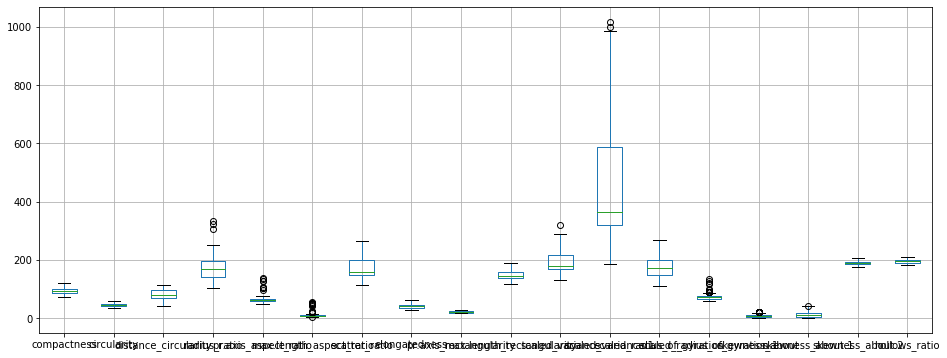

In [18]:
plt.figure(figsize=(16, 6))
vehicle_df.boxplot()
plt.show()

In [19]:
##we have outliers in columns:
## 4 ,5,6,11,12,14,15,16

vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [20]:
## Separating out the columns with outliers , for better refined plot
vehicle_df_outliers=vehicle_df[['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about', 'skewness_about.1']]

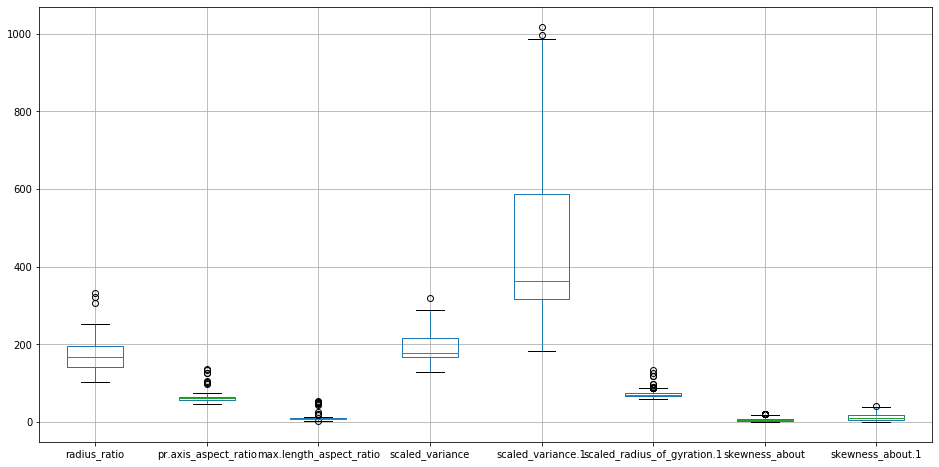

In [21]:
plt.figure(figsize=(16, 8))
vehicle_df_outliers.boxplot()
plt.show()

In [22]:
## since Class is the only Non numeric Column here, let us encode it to numeric values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
vehicle_df['class'] = labelencoder.fit_transform(vehicle_df['class'])
vehicle_df['class'].head(5)

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [23]:
## Treating/supressing the outliers using log

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

vehicle_df['radius_ratio'] = log_transformer.fit_transform(vehicle_df[['radius_ratio']])
vehicle_df['pr.axis_aspect_ratio'] = log_transformer.fit_transform(vehicle_df[['pr.axis_aspect_ratio']])
#vehicle_df['max.length_aspect_ratio'] = log_transformer.fit_transform(vehicle_df[['max.length_aspect_ratio']])  --Removed this because on making this log transformed,
## we found instead of outliers being surpressed, they doubled.
vehicle_df['scaled_variance'] = log_transformer.fit_transform(vehicle_df[['scaled_variance']])
vehicle_df['scaled_variance.1'] = log_transformer.fit_transform(vehicle_df[['scaled_variance.1']])
vehicle_df['scaled_radius_of_gyration.1'] = log_transformer.fit_transform(vehicle_df[['scaled_radius_of_gyration.1']])
vehicle_df['skewness_about'] = log_transformer.fit_transform(vehicle_df[['skewness_about']])
vehicle_df['skewness_about.1'] = log_transformer.fit_transform(vehicle_df[['skewness_about.1']])

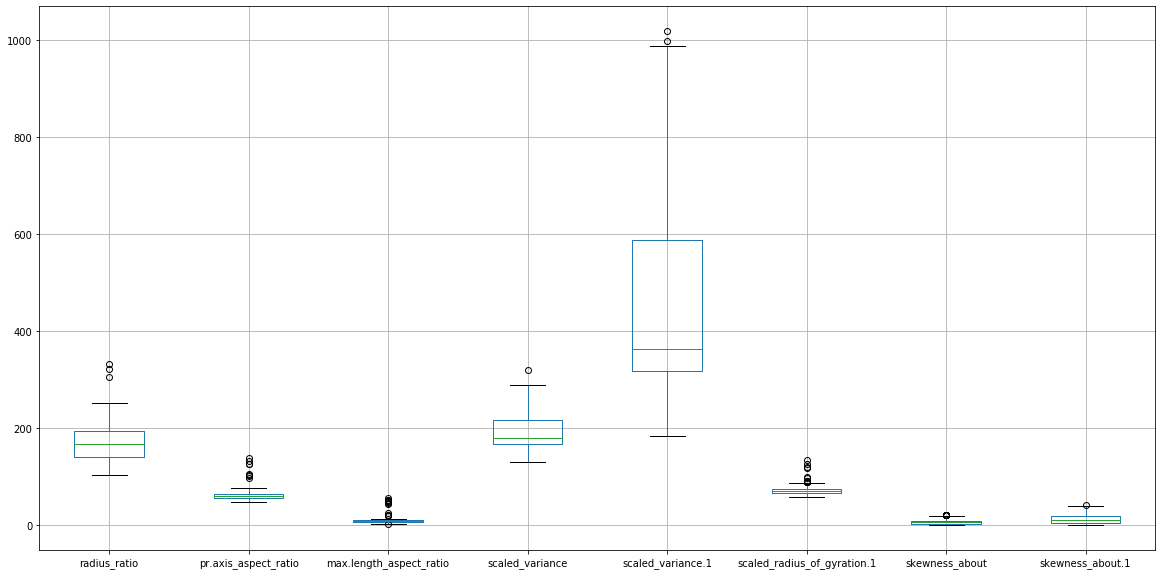

In [24]:
## let us see if any outliers supressed
plt.figure(figsize=(20, 10))
pd.DataFrame(vehicle_df_outliers).boxplot()
plt.show()

### Treating Outliers one by one
#### Generally, observations larger than q3 + t or smaller than ql - t, whereby t = 1.5(q3 -ql), are regarded as outliers.


### 1. Handling outlier for radius_ratio

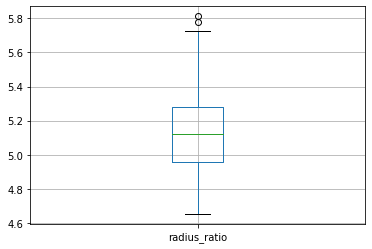

In [25]:

vehicle_df[['radius_ratio']].boxplot()

In [26]:
q3 = vehicle_df[['radius_ratio']].quantile(0.75).radius_ratio
q1 = vehicle_df[['radius_ratio']].quantile(0.25).radius_ratio
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

In [27]:
print(outliers_above)
print(outliers_below)
q3

5.600402260859773
4.633539455972005


5.278114659230517

In [28]:
vehicle_df.loc[vehicle_df.radius_ratio>5.60].count().radius_ratio ## looking for records with values above uper 

3

In [29]:
vehicle_df.shape  
## (846,19 ) out of 845 only 3 of them are beyond above wisker, 
## Hence we may replace  these 3 values with q3+t value of this column.


(846, 19)

In [30]:
vehicle_df_max = vehicle_df.copy(deep = True)
vehicle_df_max.loc[vehicle_df_max.radius_ratio>5.60, 'radius_ratio'] = 5.60

In [31]:
vehicle_df_max.loc[vehicle_df_max.radius_ratio>5.60].count().radius_ratio ## Outliers have been removed

0

In [32]:
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['radius_ratio'] <4.63].count()['radius_ratio']
count_outliers_below  ## there are no records below outliers_below value

0

## 2. Handling outlier for 'pr.axis_aspect_ratio'

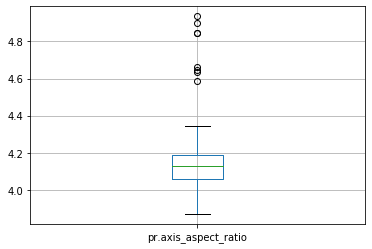

In [33]:
vehicle_df_max[['pr.axis_aspect_ratio']].boxplot()

In [34]:
q3_2 = vehicle_df_max[['pr.axis_aspect_ratio']].quantile(0.75)['pr.axis_aspect_ratio']
q1 = vehicle_df_max[['pr.axis_aspect_ratio']].quantile(0.25)['pr.axis_aspect_ratio']
t = q3_2-q1
outliers_above = q3_2+t
outliers_below = q1-t

print("outliers_above", outliers_above)
print("outliers_below",outliers_below)
q3_2

outliers_above 4.318866473506431
outliers_below 3.931231279066413


4.189654742026425

In [35]:
count_outliers_above =vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio'] >4.31].count()['pr.axis_aspect_ratio']
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio'] <3.93].count()['pr.axis_aspect_ratio']

print("count_outliers_above", count_outliers_above)
print("count_outliers_below",count_outliers_below)

### we can see there are outliers on both side of the wishker. 
## the count of ones on above side are pretty high than the ones below.

count_outliers_above 23
count_outliers_below 9


In [36]:
## Let us replace the above outliers with outliers_above value of the column i.e. 73, and the below outliers with 49
vehicle_df_max = vehicle_df_max.copy(deep = True)
vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio']>23, 'pr.axis_aspect_ratio'] = 23

In [37]:
vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio']>23].count()['pr.axis_aspect_ratio'] 
## above Outliers have been removed

0

In [38]:
vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio']<9, 'pr.axis_aspect_ratio'] = 9


In [39]:
vehicle_df_max.loc[vehicle_df_max['pr.axis_aspect_ratio']<9].count()['pr.axis_aspect_ratio'] 
## below Outliers have been removed

0

### 3. Handling outlier for 'max.length_aspect_ratio'

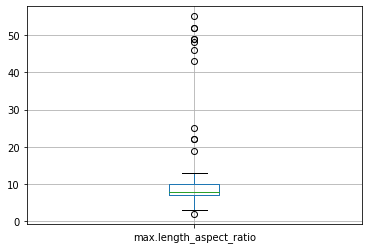

In [40]:
vehicle_df_max[['max.length_aspect_ratio']].boxplot()

## we can see that 1) Outliers are present on both sides of box ,
## 2)the outliers here are very very far from the upper wishker of boxplot so we can remove the ones that are say, > 40 
## while replacing the ones near upper wishker with  q3+t value.We can see lower outlier near lower wishker.hence 
## It can be considerred as equal as lower wishker value. 

In [41]:
q3_3 = vehicle_df_max[['max.length_aspect_ratio']].quantile(0.75)['max.length_aspect_ratio']
q1 = vehicle_df_max[['max.length_aspect_ratio']].quantile(0.25)['max.length_aspect_ratio']
t = q3_3-q1
outliers_above = q3_3+t
outliers_below = q1-t

print("outliers_above", outliers_above)
print("outliers_below",outliers_below)
print("q3_3",q3_3)

outliers_above 13.0
outliers_below 4.0
q3_3 10.0


In [42]:
count_outliers_above =vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio'] >13].count()['max.length_aspect_ratio']
print("count_outliers_above", count_outliers_above)


count_outliers_above 12


In [43]:
## replacing near ones with q3+t value
vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio']>13, 'max.length_aspect_ratio'] = q3_3

In [44]:
count_outliers_above_Left =vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio'] >4].count()['max.length_aspect_ratio']
print("count_outliers_above_Left", count_outliers_above_Left)

count_outliers_above_Left 823


In [45]:
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio'] < 4].count()['max.length_aspect_ratio']
print("count_outliers_below",count_outliers_below)


count_outliers_below 5


In [46]:
vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio']<4, 'max.length_aspect_ratio'] = outliers_below

In [47]:
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['max.length_aspect_ratio'] < 4].count()['max.length_aspect_ratio']
print("count_outliers_below",count_outliers_below)

count_outliers_below 0


### 4. Handling outlier for 'scaled_radius_of_gyration.1'

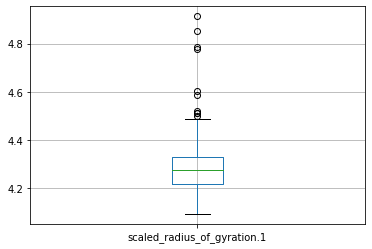

In [48]:
vehicle_df_max[['scaled_radius_of_gyration.1']].boxplot()

## we can see that 1) Outliers for this are close to upper wishker hence we will replace above  outliers with q3+t value
## cant see lower ones yet, if any.

In [49]:
q3_5 = vehicle_df_max[['scaled_radius_of_gyration.1']].quantile(0.75)['scaled_radius_of_gyration.1']
q1 = vehicle_df_max[['scaled_radius_of_gyration.1']].quantile(0.25)['scaled_radius_of_gyration.1']
t = q3_5-q1
outliers_above = q3_5+t
outliers_below = q1-t

print("outliers_above", outliers_above)
print("outliers_below",outliers_below)
print("q3_5",q3_5)

outliers_above 4.441958975396555
outliers_below 4.108282070065883
q3_5 4.330733340286331


In [50]:
count_outliers_above =vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1'] >4.44].count()['scaled_radius_of_gyration.1']
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1'] <4.10].count()['scaled_radius_of_gyration.1']

print("count_outliers_above", count_outliers_above)
print("count_outliers_below",count_outliers_below)   ## no lower whisker, outliers present.

count_outliers_above 69
count_outliers_below 1


In [51]:
## The distribution here is left skewed, most outliers are on right side
#sns.distplot(vehicle_df_max['scaled_radius_of_gyration.1'])

In [52]:
## replacing near ones with q3+t value
vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1']>4.44, 'scaled_radius_of_gyration.1'] = q3_5
count_outliers_above_left =vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1'] >4.44].count()['scaled_radius_of_gyration.1']
count_outliers_above_left

0

In [53]:
vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1']<4.10, 'scaled_radius_of_gyration.1'] = 4.10
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['scaled_radius_of_gyration.1'] <4.10].count()['scaled_radius_of_gyration.1']
print("scaled_radius_of_gyration.1 :",count_outliers_below)

scaled_radius_of_gyration.1 : 0


## 5. Handling outlier for 'skewness_about.1'


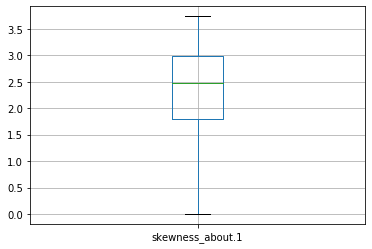

In [54]:
vehicle_df_max[['skewness_about.1']].boxplot()

In [55]:
q3_7 = vehicle_df_max[['skewness_about.1']].quantile(0.75)['skewness_about.1']
q1 = vehicle_df_max[['skewness_about.1']].quantile(0.25)['skewness_about.1']
t = q3_7-q1
outliers_above = q3_7+t
outliers_below = q1-t

print("outliers_above", outliers_above)
print("outliers_below",outliers_below)
print("q3_7",q3_7)

outliers_above 4.199705077879926
outliers_below 0.5877866649021191
q3_7 2.995732273553991


In [56]:
count_outliers_above =vehicle_df_max.loc[vehicle_df_max['skewness_about.1'] >4.199].count()['skewness_about.1']
count_outliers_below=vehicle_df_max.loc[vehicle_df_max['skewness_about.1'] <0.587].count()['skewness_about.1']

print("count_outliers_above", count_outliers_above)
print("count_outliers_below",count_outliers_below)   ## no lower whisker, outliers present.

count_outliers_above 0
count_outliers_below 30


In [57]:
## replacing near ones with q3+t value
vehicle_df_max.loc[vehicle_df_max['skewness_about.1']>4.199, 'skewness_about.1'] = q3_7
count_outliers_above_left =vehicle_df_max.loc[vehicle_df_max['skewness_about.1'] >4.199].count()['skewness_about.1']
count_outliers_above_left

0

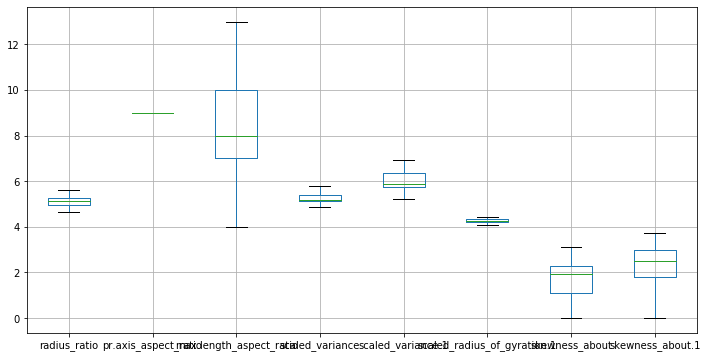

In [58]:
## with that we have removed all the outliers.
## Separating out the columns with outliers , for better refined plot
vehicle_df_without_outliers=vehicle_df_max[['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about', 'skewness_about.1']]

plt.figure(figsize=(12, 6))
vehicle_df_without_outliers.boxplot()
plt.show()

## Moving on to 2. EDA - Understanding Understanding the attributes -


In [59]:
## Finding relationship between different attributes (Independent variables) 
## to choose carefully which all attributes have to be a part of the analysis further

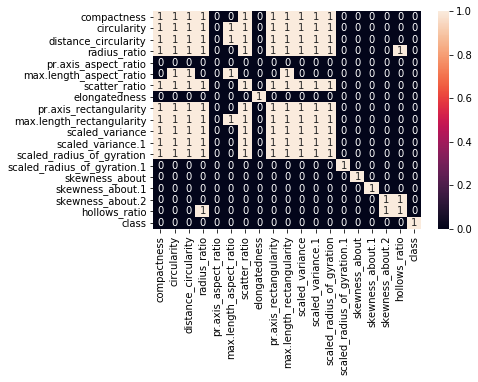

In [60]:
## A quick look at corr matrix of all variables with corr value >0.5 i.e. stronger relationship can be good start point.
sns.heatmap(vehicle_df_max.corr() >0.5, annot=True)

## we can see below variables to have strong relation

## compactness,circularity, distane_circularity, radius_ratio, max.length_aspect_ratio ,scatter_ratio, 
## pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration 

In [61]:
vehicle_df_max.shape

strong_columns=["compactness","circularity", "distance_circularity", "radius_ratio", "max.length_aspect_ratio" ,"scatter_ratio", 
 "pr.axis_rectangularity", "max.length_rectangularity", "scaled_variance","scaled_variance.1", "scaled_radius_of_gyration"]

strong_columns

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration']

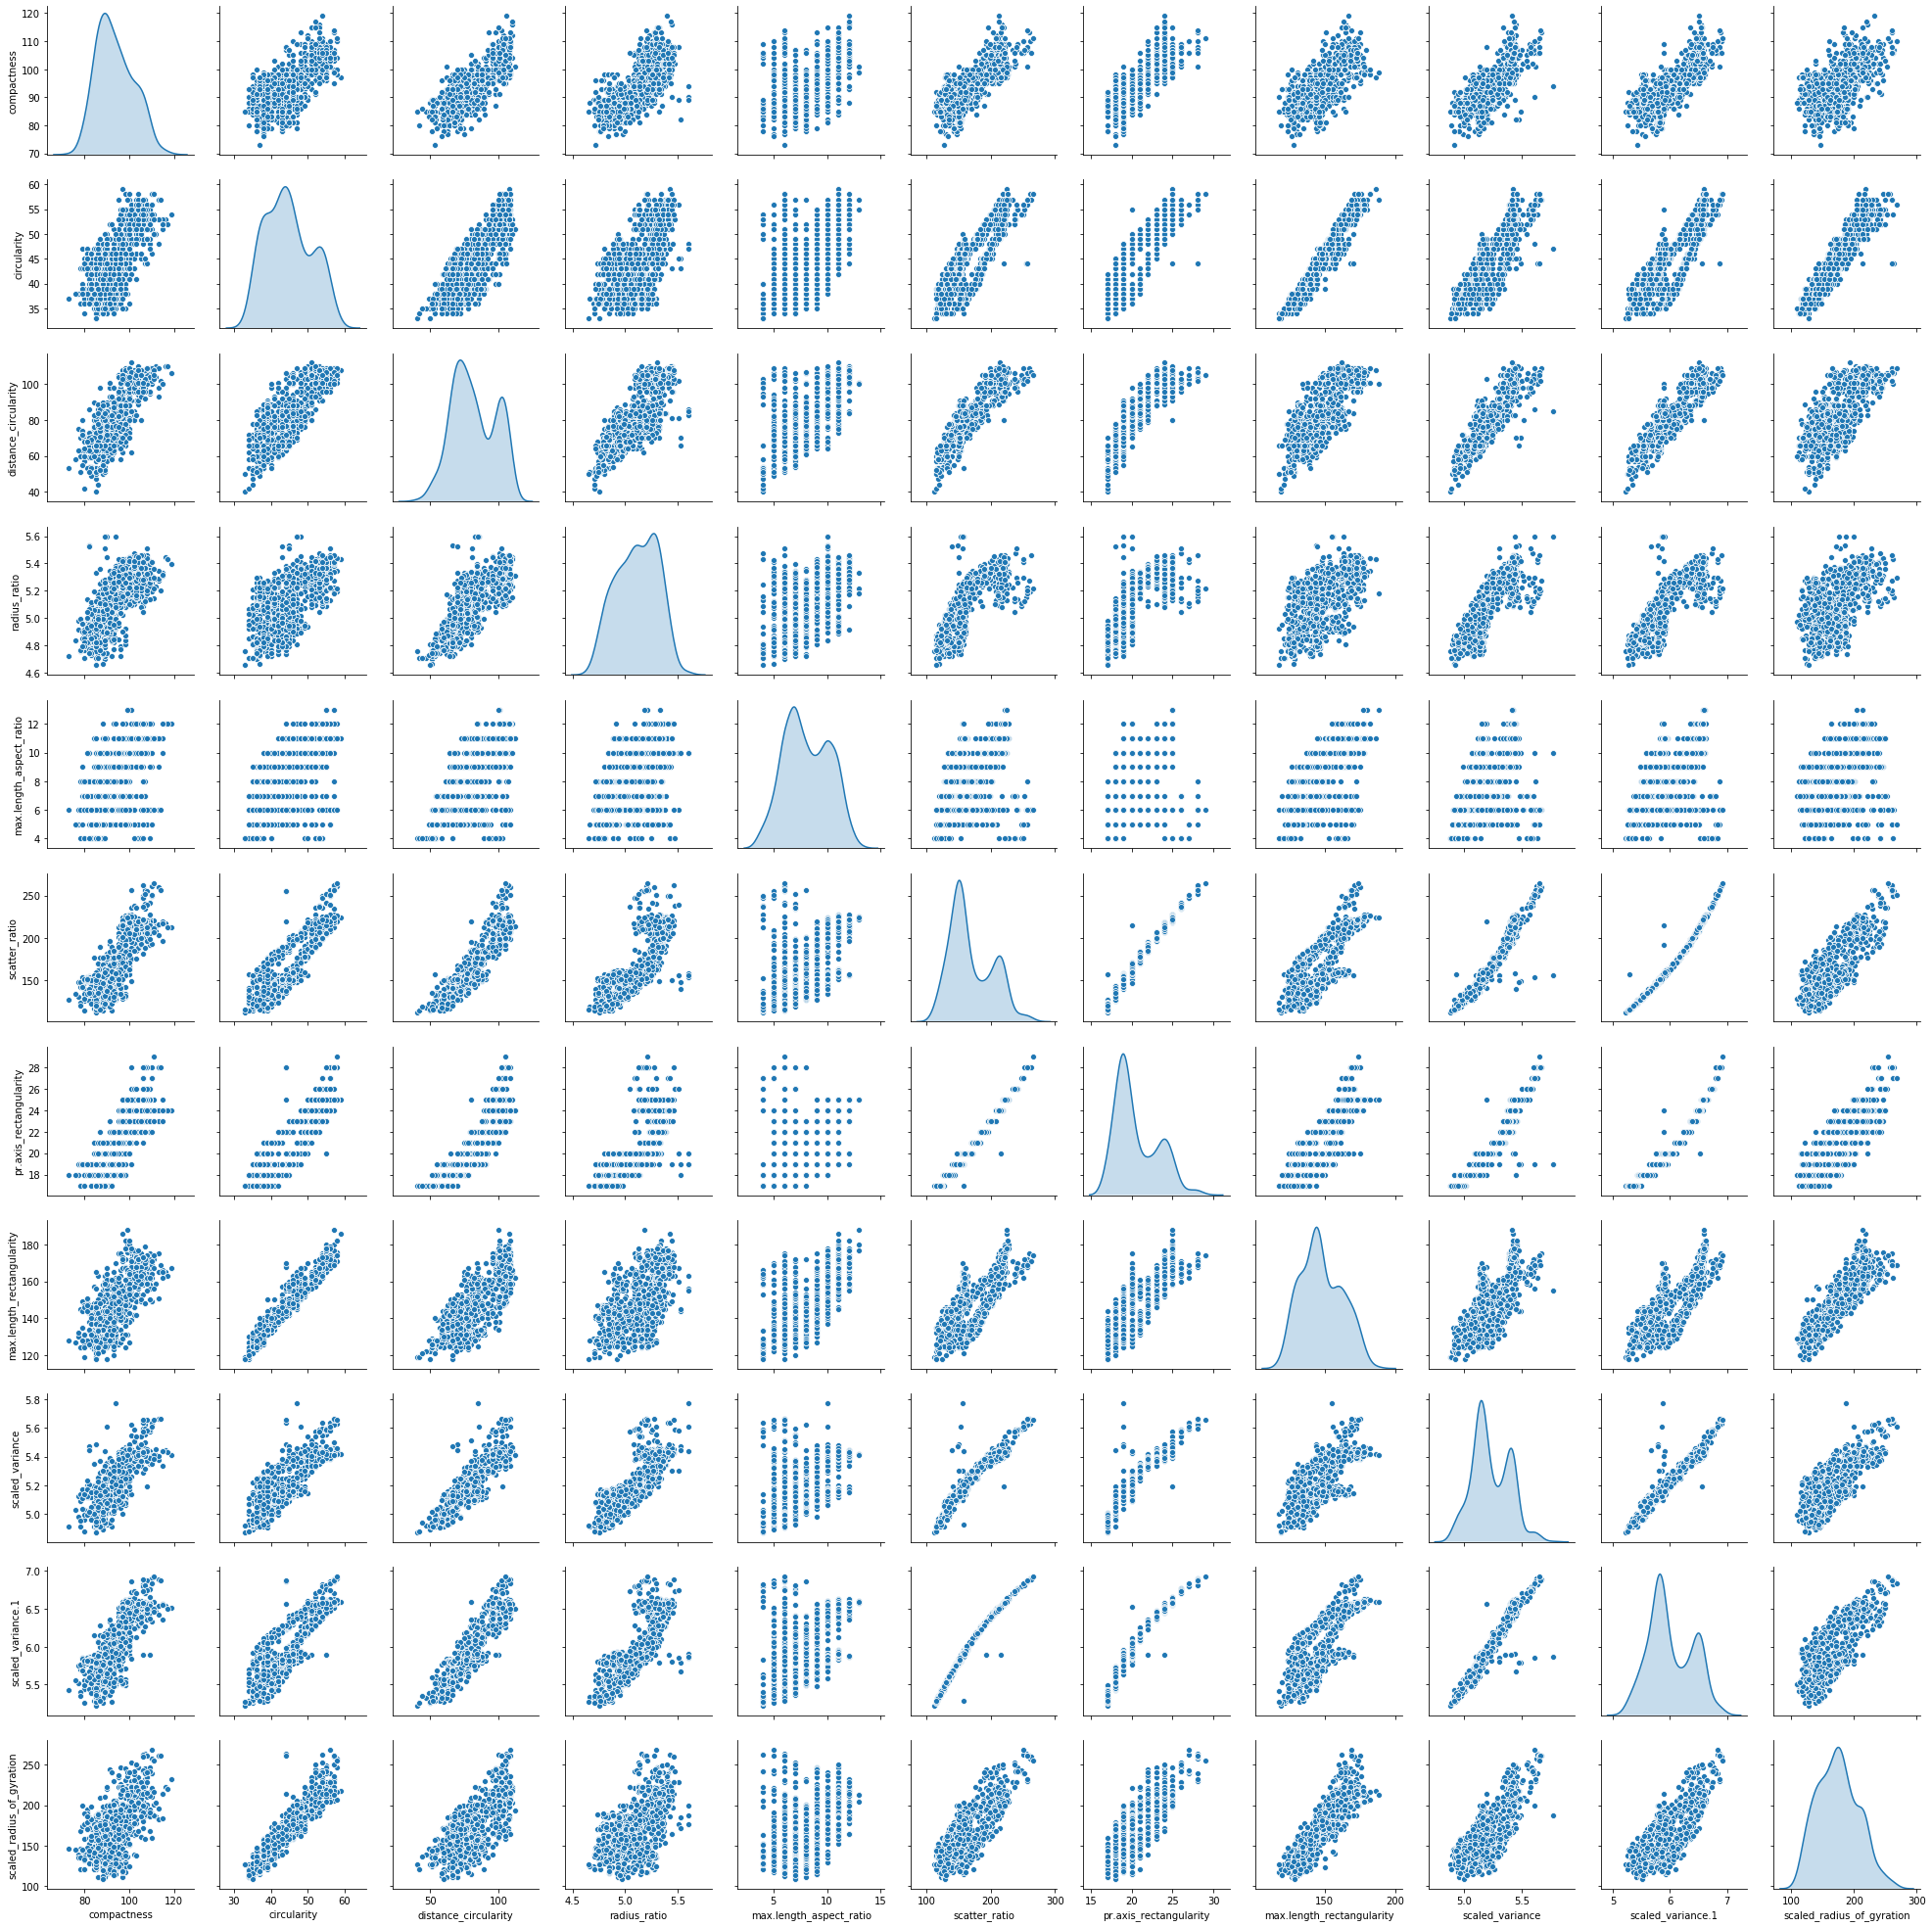

In [62]:
## Let us do the pair plot keeping close view of above 11 features.
sns.pairplot(vehicle_df_max,vars=strong_columns, diag_kind='kde')

## as expected these variables has strong relation mostly linear, but others having more of sphere like shapes.
# accross diagonals we can see, close to 3 gaussians indicating 3 or more clusters, in data.

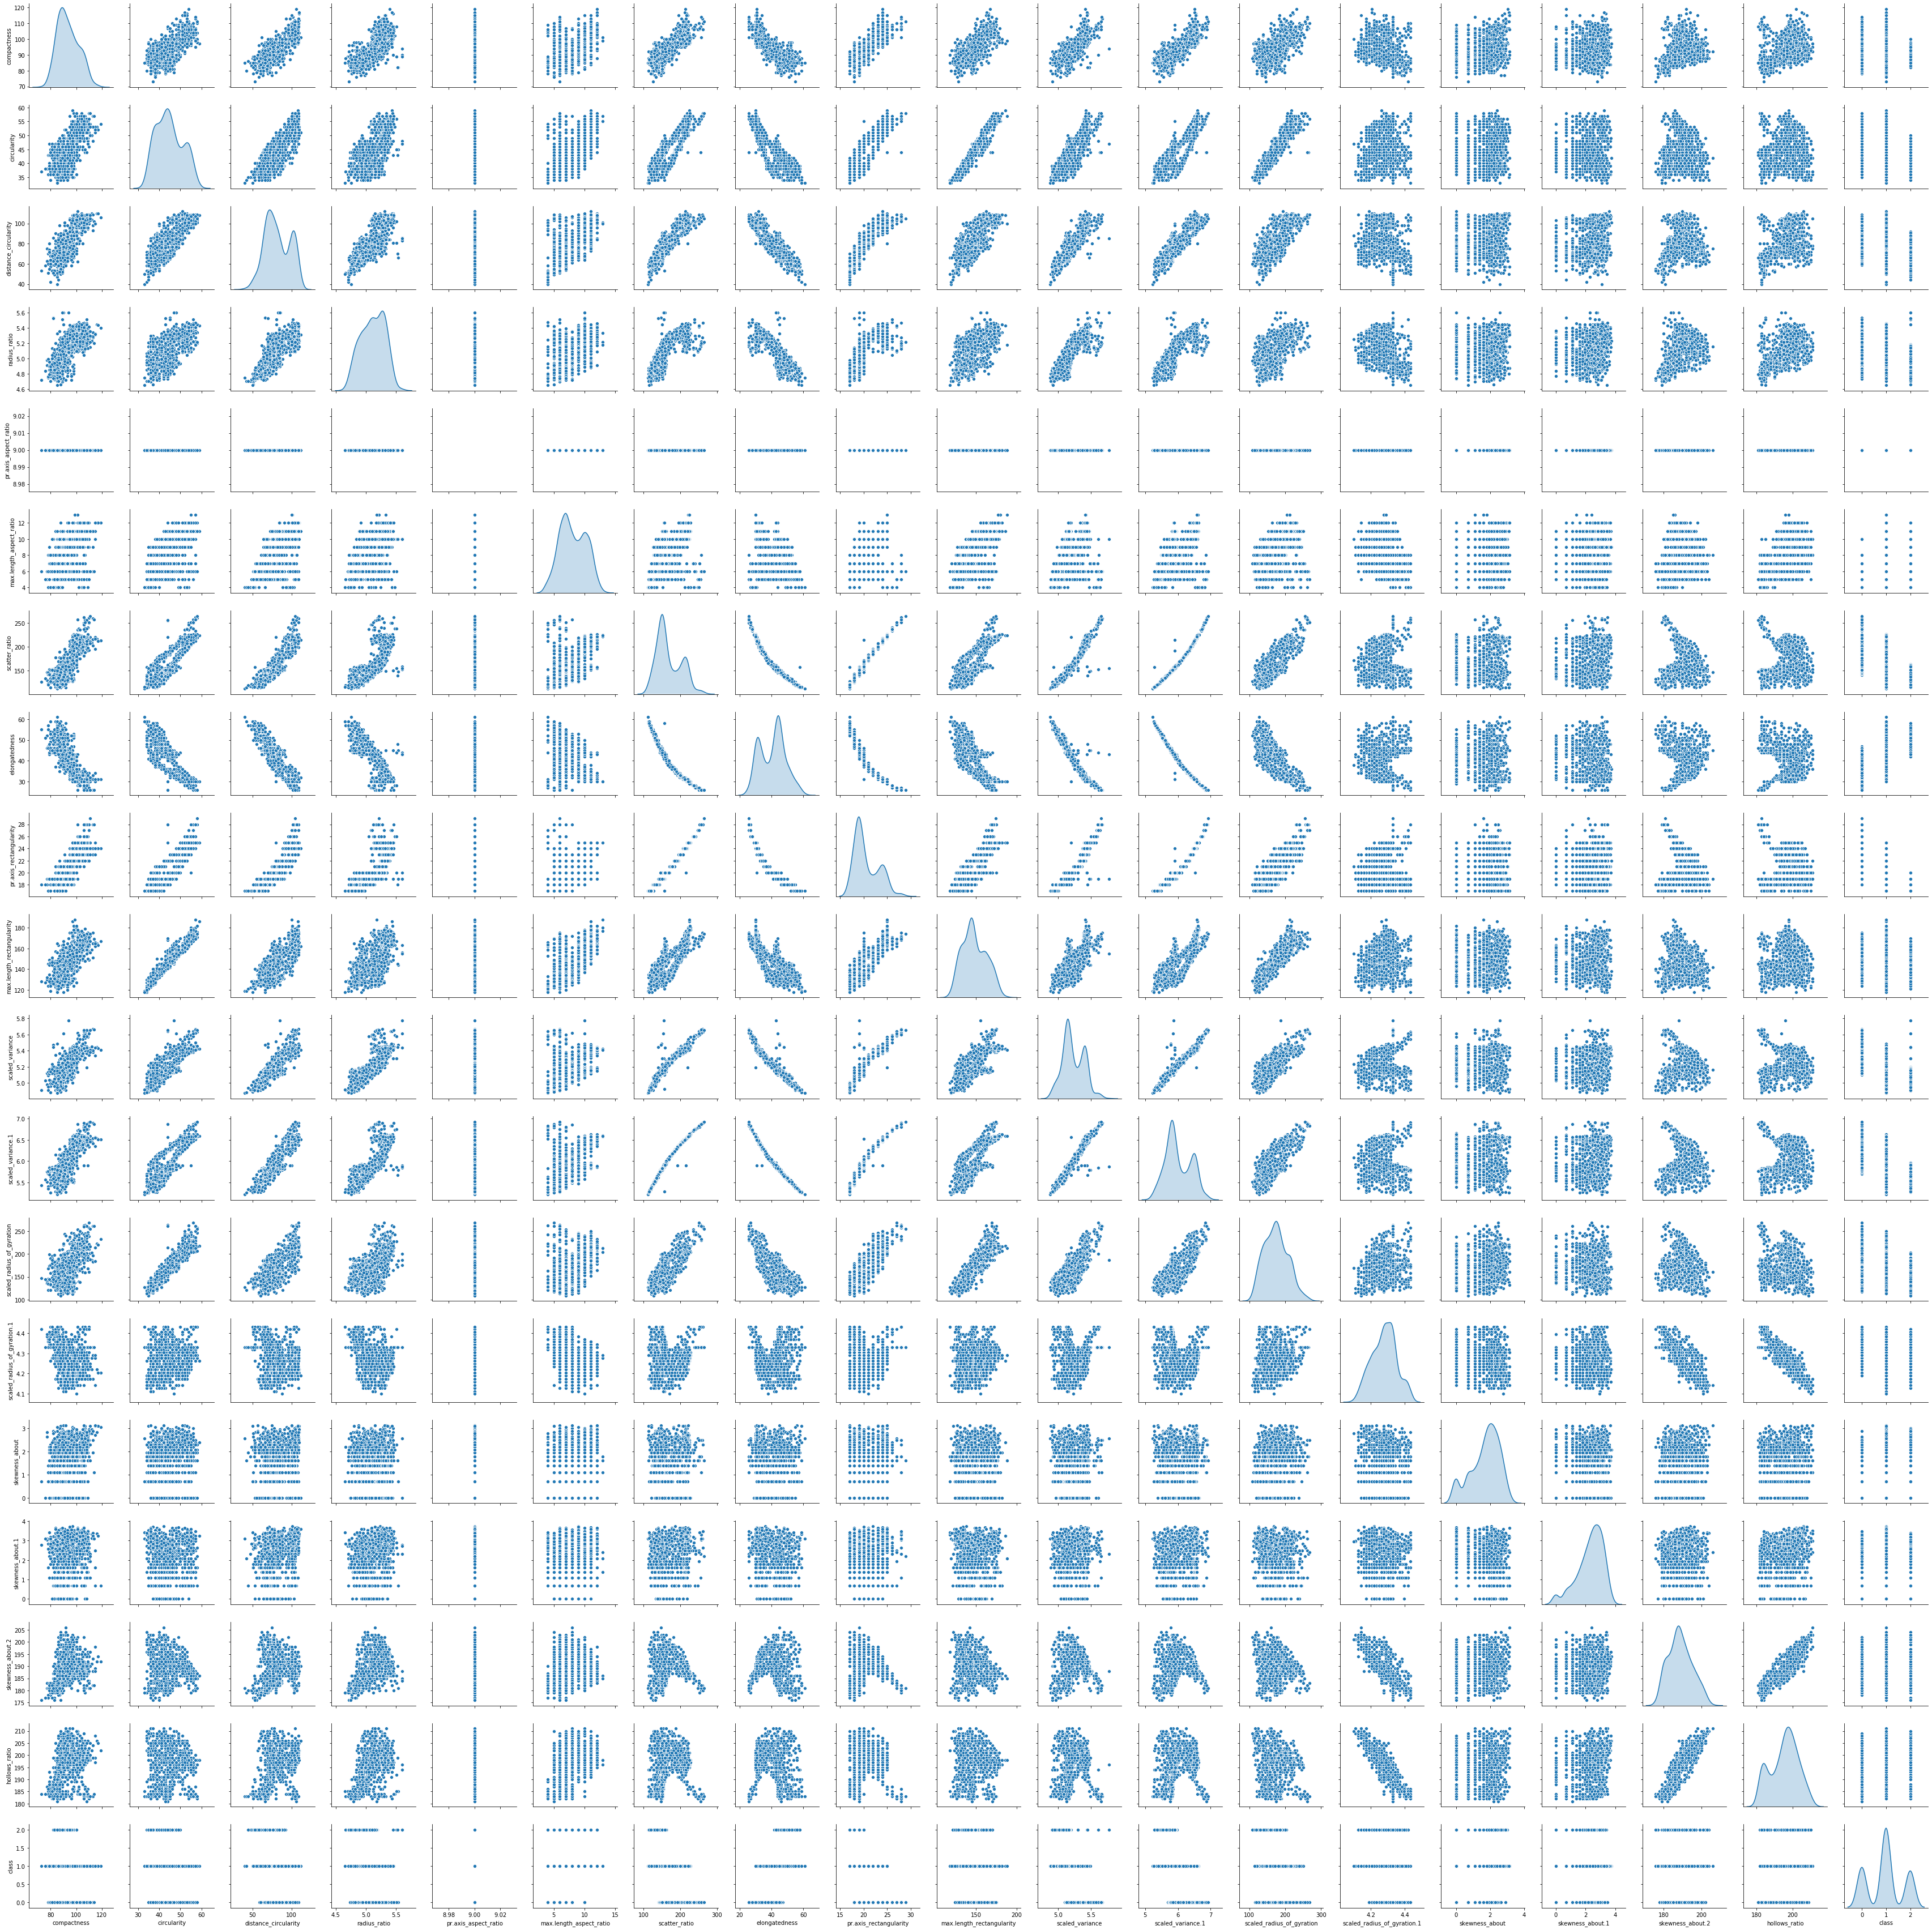

In [63]:
## Let us see full pairplot 
sns.pairplot(vehicle_df_max, diag_kind='kde')

In [64]:
#vehicle_df_max.columns

In [65]:
X = vehicle_df_max.drop('class', axis = 1)
# Standardising the independent variables
sc = StandardScaler()
X_std =  sc.fit_transform(X) 
y = vehicle_df_max['class']

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size=test_size, random_state=seed)

In [66]:
## applying Simplest model for accuracy first
linR = LinearRegression()
linR.fit(x_train, y_train)
y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

# Train MSE
predictedTrain = linR.predict(x_train)
print(mean_squared_error(predictedTrain, y_train))

# Test MSE
print(mean_squared_error(y_test_pred, y_test))

Training accuracy on selected features: 0.653
Testing accuracy on selected features: 0.633
0.169794637176265
0.1833614561392813


In [67]:
## we can see that Linear model could only give an accuracy of 65 % on train and 63 on Test.

In [68]:
## let us try some polynomial transformation over data

In [69]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
#xPoly_train[0:5]

In [70]:
regression_modelP2 = linR.fit(xPoly_train, y_train)
# Train R^2
print(regression_modelP2.score(xPoly_train, y_train))

0.8740423936558417


In [71]:
## we can see that even after transforming data to polynomial, we could only improve the accuracy 
## from Linear model's 66 % to 88.7% only. Hence skipping its result from further analysis.

### 3. PCA - Lets us increase the signal in signal to noise ratio, and further reduce the dimensions


In [72]:
## we already have standardised indep variables
cov_matrix = np.cov(X_std.T)
#print('Covariance Matrix \n%s', cov_matrix

In [73]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.72474762e-01  1.15478701e-01  6.14242611e-02  9.60450734e-02
   1.24344833e-01 -2.72707629e-01 -6.85796475e-01  4.00446048e-01
   3.53428369e-01  1.51284262e-01  3.29582435e-02  7.65287617e-03
   8.29247984e-02 -1.40985569e-01  5.21560931e-02  5.08211902e-03
  -2.18347449e-02  0.00000000e+00]
 [ 2.89548742e-01 -1.35433032e-01  1.82500076e-01 -7.00534726e-02
  -1.33886516e-01  4.05070134e-01 -7.65121604e-02  2.17029091e-02
   3.15518332e-02 -1.35575810e-01 -1.98701301e-01  6.64360224e-03
   2.89642850e-01 -1.83276504e-01 -7.02439500e-01  1.37159958e-02
  -3.57465161e-02  0.00000000e+00]
 [ 3.04171316e-01  5.82817717e-02 -6.65986733e-02  2.93555611e-02
  -9.70073021e-02 -1.87976047e-01  9.44043600e-02 -2.43883971e-01
  -6.39846404e-02  5.92465054e-01 -6.28714415e-01 -1.42437635e-01
   4.09080646e-02  1.09777622e-01  3.35916808e-02 -1.05826484e-02
  -2.18364704e-03  0.00000000e+00]
 [ 2.64669331e-01  2.00397369e-01 -6.80130863e-02 -9.88515884e-02
   1.74817452e-01  

In [74]:
# Step 3 (continued): Sort eigenvalues in descending order
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
#print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.662659396563763, 3.134303358887728, 1.1530678875471039, 0.960202433657403, 0.8553808152687152, 0.33714394986799845, 0.2964813362146638, 0.19817673388234552, 0.13239646185138082, 0.08056441362498393, 0.06545320007687526, 0.05471017068066364, 0.0319218190661467, 0.02746497137052439, 0.020641596667784066, 0.005927131866544057, 0.0036226661006491727, 0.0]


In [76]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
print(cum_var_exp)

[0.56771987 0.75187272 0.81962007 0.87603581 0.92629285 0.9461014
 0.96352087 0.97516454 0.98294336 0.98767685 0.99152248 0.99473692
 0.99661246 0.99822613 0.99943891 0.99978715 1.         1.        ]


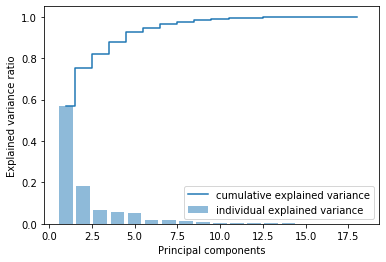

In [77]:
## Plotting the elbow graph with alpha as 0.5
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [78]:
# Its good to consider 95% or more, of the Varience graph , so let us try taking from 0 to 7th PCA dimensiona and 
## increase to say 11 (that cover upto 98% of variance, and it is safe generally to reduce the noise with 2%)
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:11])   # Reducing to 15 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [79]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

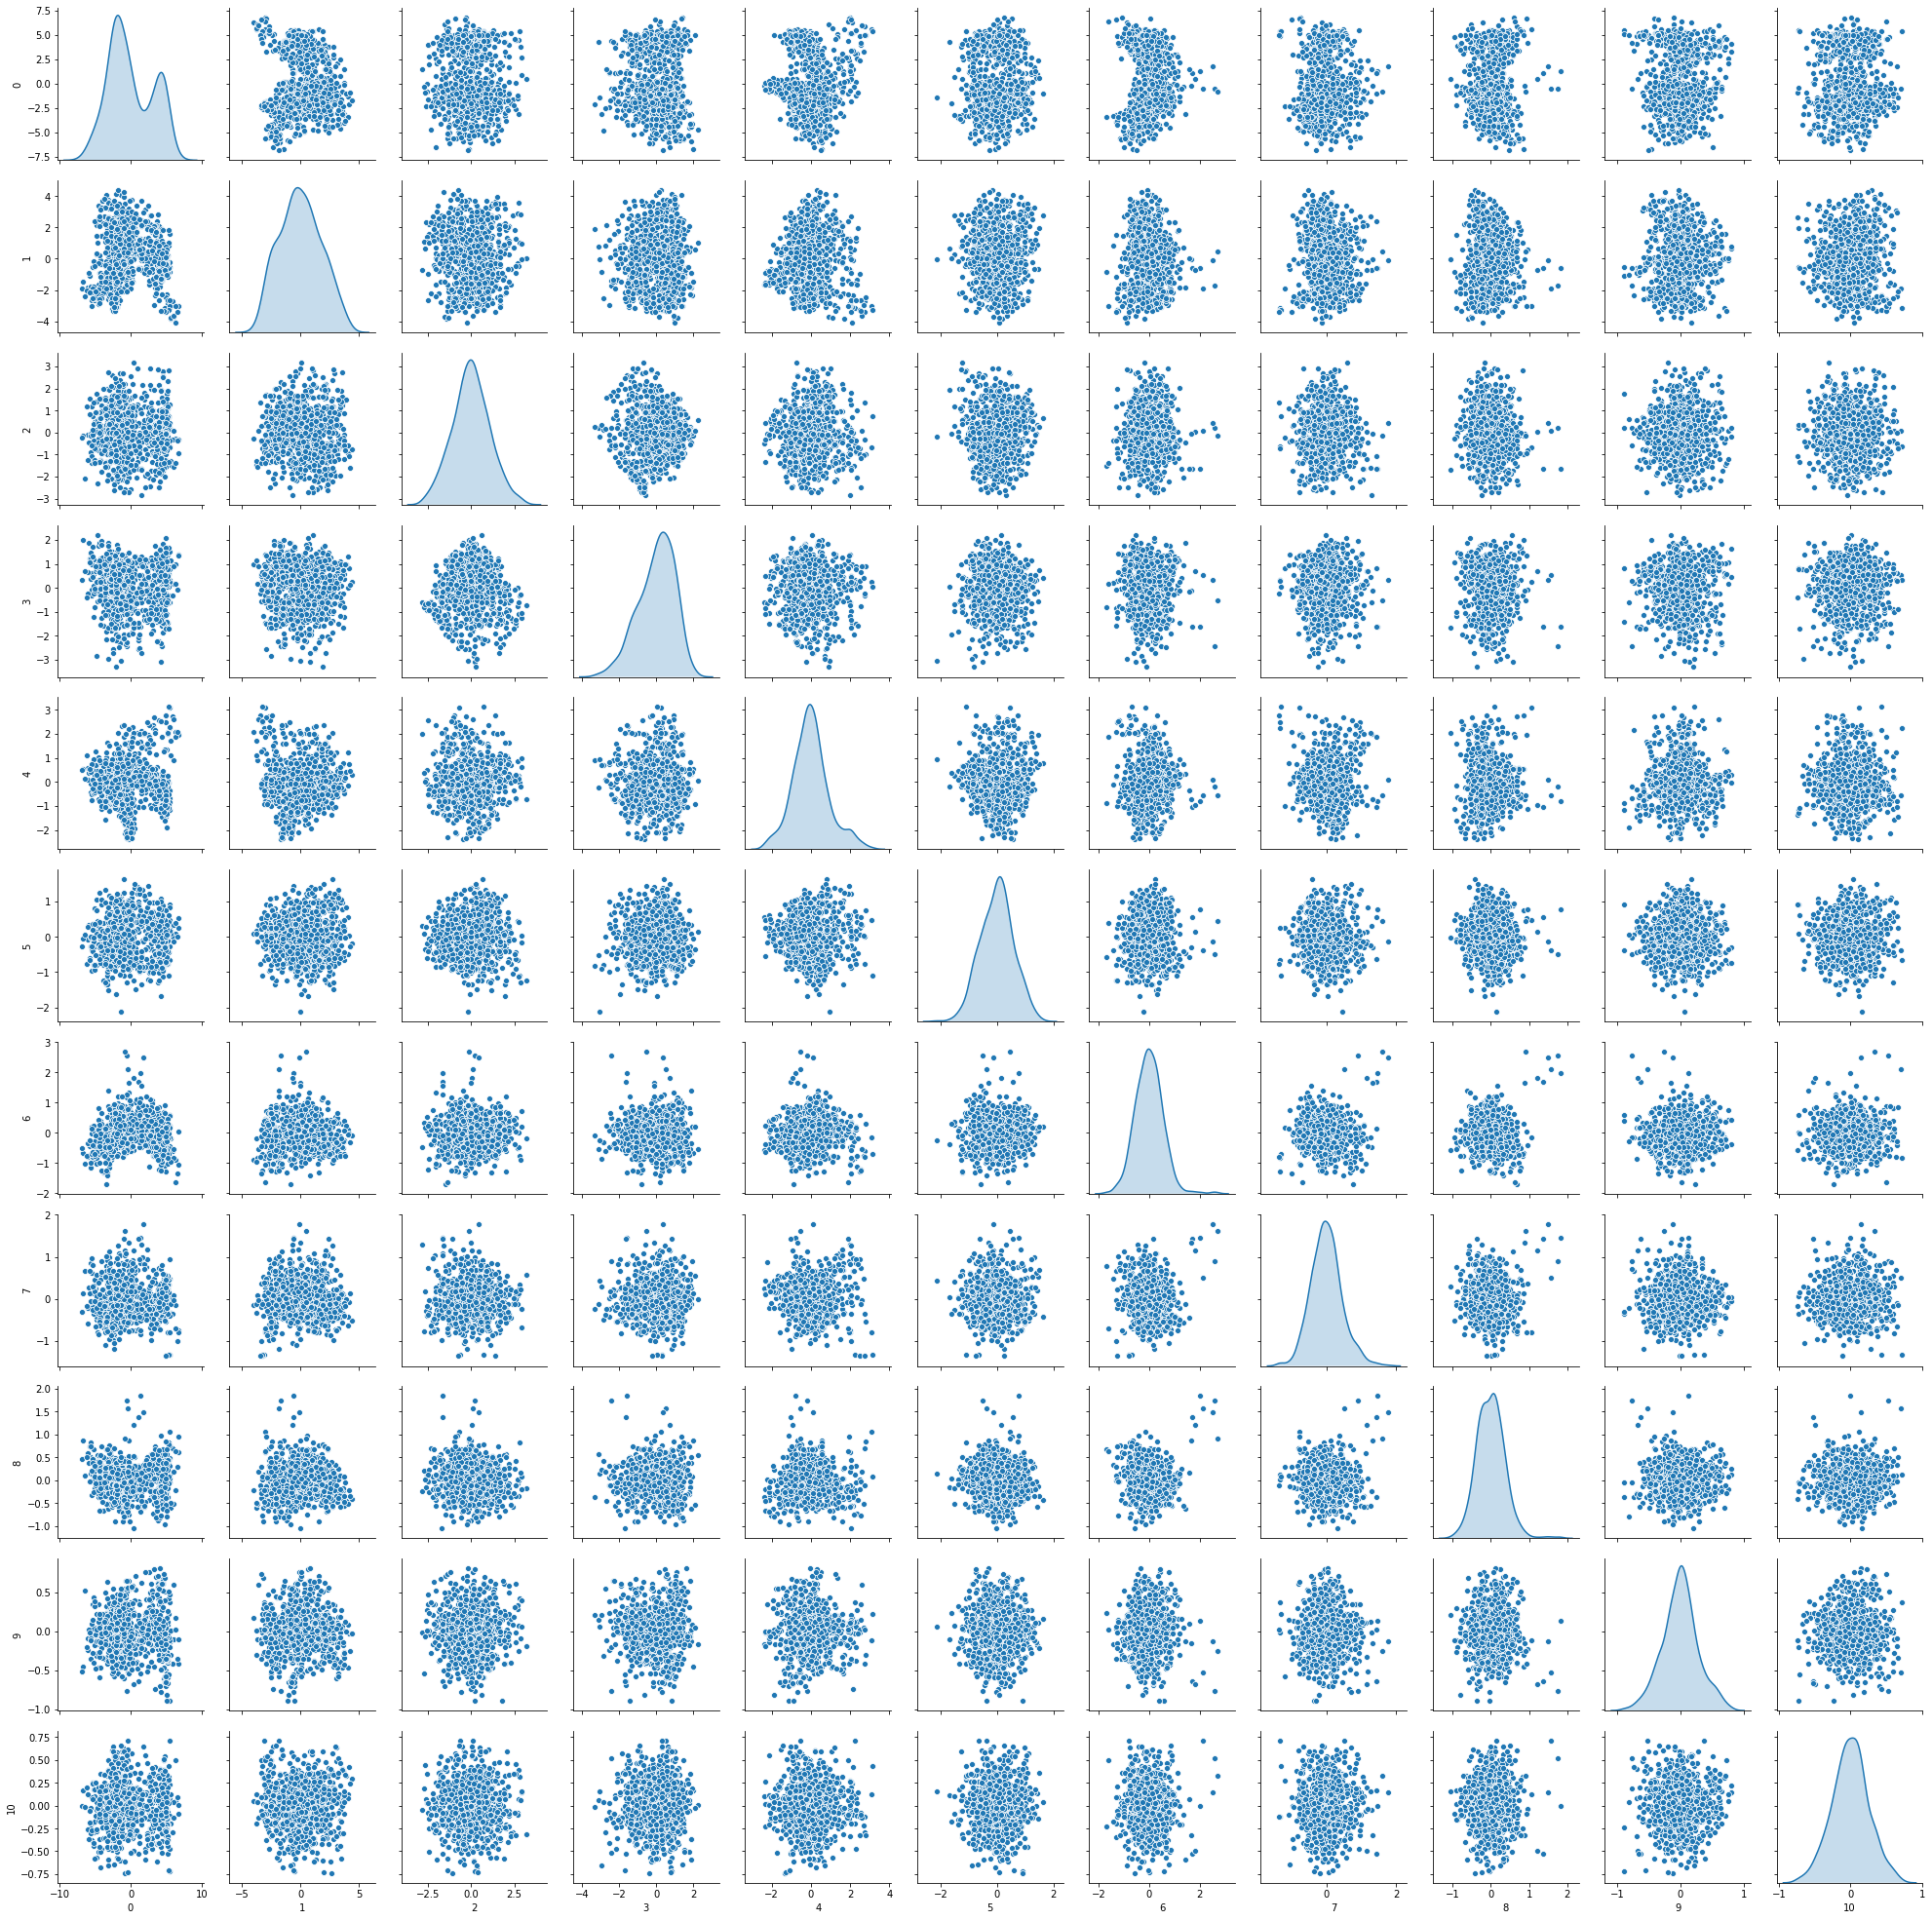

In [80]:
#Let us check it visually
sns.pairplot(Proj_data_df, diag_kind='kde') 

### 4. Using Support vector machines as model


In [81]:
from sklearn.svm import SVC # "Support vector classifier"
svc_model = SVC(kernel='linear', C=0.01)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))

0.8429054054054054
0.8543307086614174
Confusion Matrix:
 [[ 49  16   1]
 [ 11 109   7]
 [  1   1  59]]


In [82]:
from sklearn.svm import SVC # "Support vector classifier"
svc_model = SVC(kernel='linear', C=0.05)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))
##Slight improvemet in score

0.8665540540540541
0.8700787401574803
Confusion Matrix:
 [[ 55   9   2]
 [ 12 109   6]
 [  1   3  57]]


In [83]:
from sklearn.svm import SVC # "Support vector classifier"
svc_model = SVC(kernel='linear', C=0.5)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))
##Slight improvemet in score

0.8766891891891891
0.8622047244094488
Confusion Matrix:
 [[ 55  10   1]
 [ 14 109   4]
 [  2   4  55]]


In [84]:
from sklearn.svm import SVC # "Support vector classifier"

svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))
##Slight improvemet in score

0.8800675675675675
0.8622047244094488
Confusion Matrix:
 [[ 56   9   1]
 [ 14 109   4]
 [  1   6  54]]


In [85]:
print('Building a Support Vector Machine on train data kernel=rbf C=1')
svc_model = SVC(kernel='rbf', C=1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))


Building a Support Vector Machine on train data kernel=rbf C=1
0.9712837837837838
0.9448818897637795
Confusion Matrix:
 [[ 64   1   1]
 [  3 119   5]
 [  1   3  57]]


In [86]:
## we can also do same using Grid Search CV in one go

In [87]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05,0.5, 0.1,1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)


Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [88]:
#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9448818897637795
Confusion Matrix:
 [[ 64   3   1]
 [  1 119   3]
 [  1   5  57]]


In [89]:
pd.crosstab(prediction,y_test)  ## Cross tab to check the predicted vs y_test or recall and precision

class   0    1   2
row_0             
0      64    3   1
1       1  119   3
2       1    5  57

We can see that best performing model with accuracy of 94.48 on test data, has been found for hyperparameters like rbf and c=1.